In [1]:
#Imports
using Plots, OrdinaryDiffEq

push!(LOAD_PATH, "../src")

using Pendulum, ODE

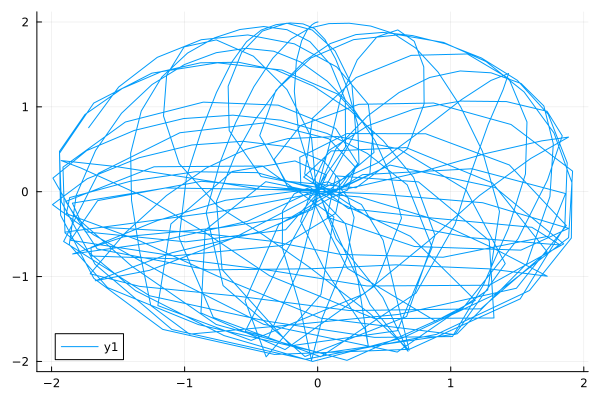

In [2]:
m1 = 1 #units of kg
m2 = 1 
l1 = 1 #units of m
l2 = 1
g = 10 #units of kg*m/s^2

pendulum = DoublePendulum([m1, m2, l1, l2, g])

x0 = [3.141f0, 3.141f0, 0, 0] 

t_transient = 0f0
N_t = 500
dt = 0.1f0

sol = trajectory(pendulum, x0, N_t, dt, t_transient)
plot_trajectory(pendulum, sol)

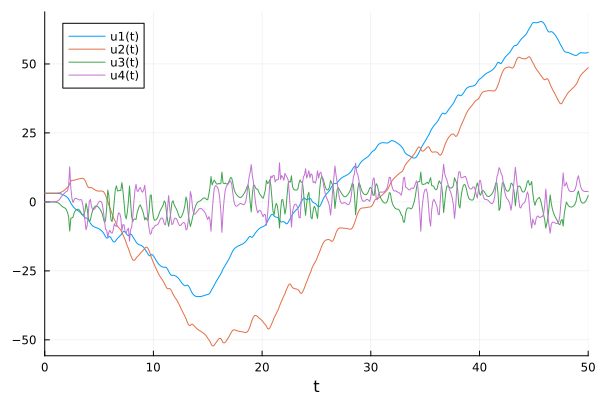

In [3]:
plot(sol)

Plots.AnimatedGif("c:\\Users\\Simon\\Documents\\PIK\\Code\\ode_test.jl\\notebooks\\pendulum.gif")
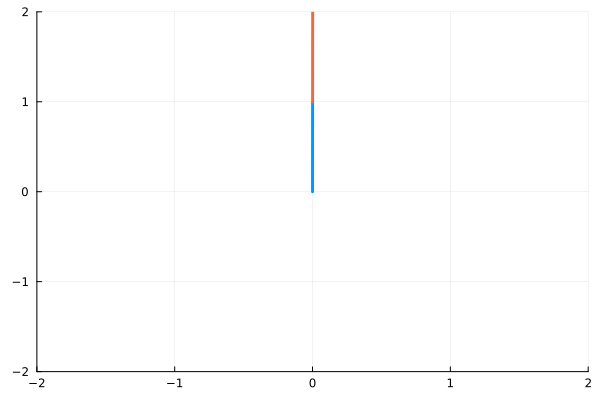

[ Info: Saved animation to c:\Users\Simon\Documents\PIK\Code\ode_test.jl\notebooks\pendulum.gif


In [28]:
create_animation(pendulum, sol)

In [4]:
train_data = generate_train_data(pendulum, 3, x0, N_t, dt, t_transient);

In [5]:
#Define ANN
p, re_nn = NODE_ANN(4,4,16,4)
#p, re_nn = load_ANN("../models/pendulum_node_model.bson")

node(u, p, t) = re_nn(p)(u)
node_prob = ODEProblem(node, x0, (Float32(0.),Float32(dt)), p);

In [6]:
model = NODE(node_prob);

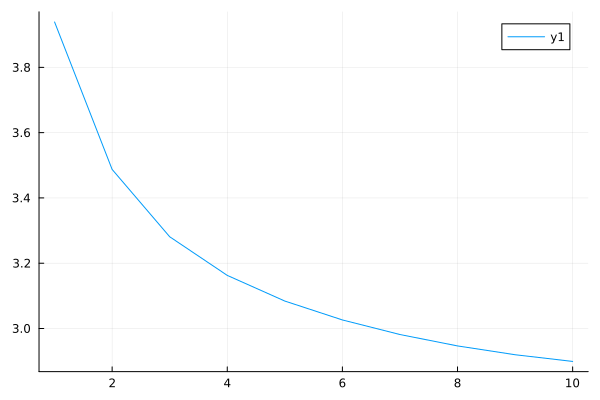

In [7]:
loss_log = train_NODE(model, train_data, 10, 1f-4)
#save_ANN(model, "../models/pendulum_node_model.bson")
plot(loss_log)

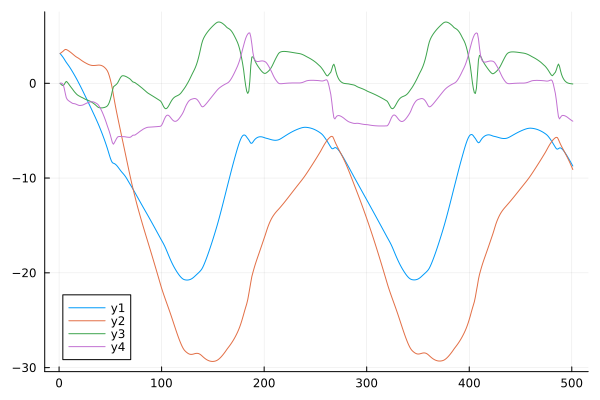

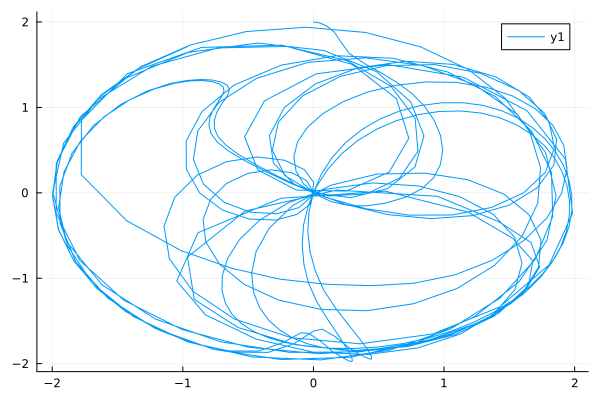

In [37]:
#Test model
t = convert(Array{Float32,1}, collect(0:0.1:50))
rec_sol = model((t,x0))
display(plot(transpose(Array(rec_sol))))
plot(sin.(rec_sol[1,:])*l1 + sin.(rec_sol[2,:])*l2, -cos.(rec_sol[1,:])*l1 - cos.(rec_sol[2,:])*l2)

[ Info: Saved animation to c:\Users\Simon\Documents\PIK\Code\ode_test.jl\notebooks\pendulum.gif


Plots.AnimatedGif("c:\\Users\\Simon\\Documents\\PIK\\Code\\ode_test.jl\\notebooks\\pendulum.gif")
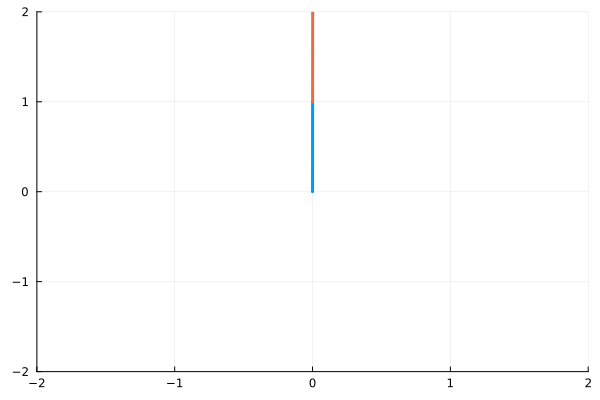

In [38]:
animate(pendulum, rec_sol)